In [1]:
# IMPORTING LIBRARIES
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# LOADING DATASETS
wine= pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#dropping the type feature
wine.drop('Type',axis=1,inplace=True)

In [7]:
# STANDARDIZING THE DATA
scaled_wine_data=scale(wine)
scaled_wine_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
pca=PCA(n_components=13)
pca_values= pca.fit_transform(scaled_wine_data)

In [9]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [10]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

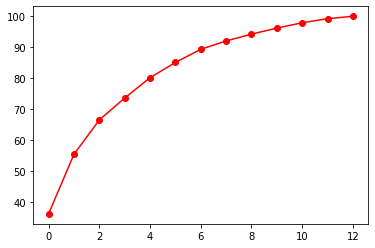

In [11]:
plt.plot(var1,"o-r");

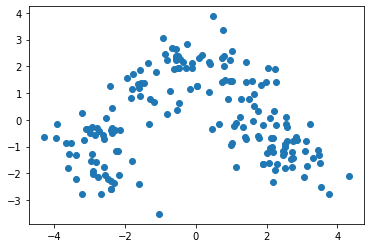

In [12]:
# TAKING 3 PC's FOR FURTHER CALCULATION
# PLOTTING BETWEEN PCA1 AND PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y);

In [14]:
# MAKING DATAFRAME WITH PC1, PC2 AND PC3
final_df=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])],axis=1)
final_df

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


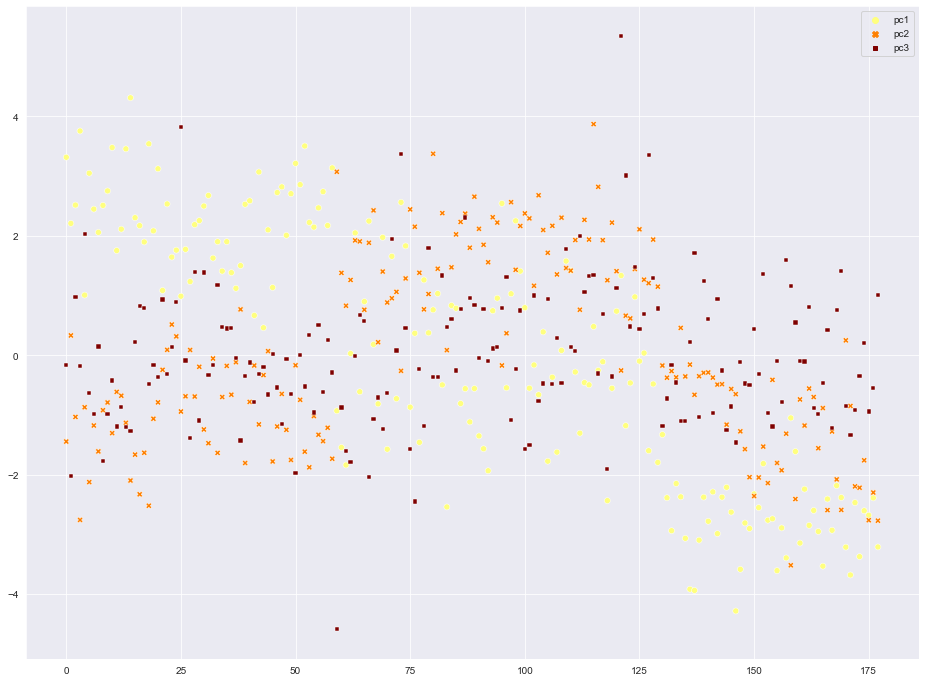

In [15]:
# VISUALIZING THE PC's
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df,palette='afmhot_r');

# USING CLUSTERING ALGORITHMS

## 1. HEIRERCHAL  METHOD

In [16]:
sns.set_theme(context='notebook',
    style='white',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)

In [17]:
# IMPORTING HEIRERCHAL CLUSTERING LIBRARIES
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

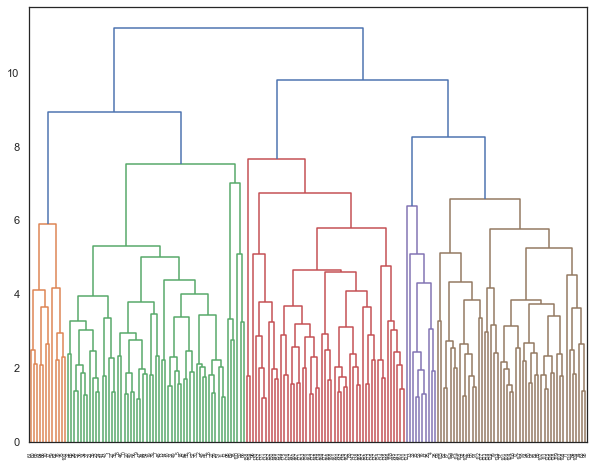

In [18]:
# CREATING DENDOGRAM
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_wine_data, method='complete'))

In [20]:
HC=AgglomerativeClustering(n_clusters=3)

In [21]:
y=pd.DataFrame(HC.fit_predict(scaled_wine_data),columns=['clustersid'])
y.value_counts()

clustersid
2             64
0             58
1             56
dtype: int64

In [22]:
HC_df=pd.concat([wine_data,y],axis=1)
HC_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [23]:
HC_df.groupby('clustersid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clustersid,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


## 2. K-MEANS CLUSTERING

In [25]:
from sklearn.cluster import KMeans

In [38]:
# CALCULATING AND PLOTTING CLUSTER WITHIN SUM OF SQUARES
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(scaled_wine_data)
    wcss.append(kmeans.inertia_)

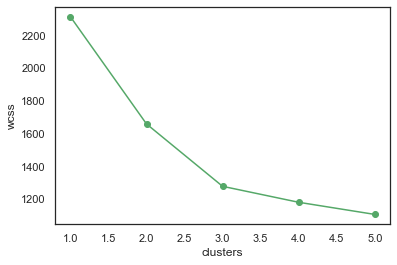

In [39]:
plt.plot(range(1,6),wcss,"o-g")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show();

In [28]:
kmeans=KMeans(n_clusters=3,random_state=4).fit(scaled_wine_data)

In [29]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
k_y=pd.DataFrame(kmeans.labels_,columns=['Clusterid'])
k_y

,Clusterid
0,2
1,2
2,2
3,2
4,2
...,...
173,0
174,0
175,0
176,0


In [31]:
K_df=pd.concat([wine_data,k_y],axis=1)
K_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [40]:
K_df['Clusterid'].value_counts()

1    65
2    62
0    51
Name: Clusterid, dtype: int64